In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn import model_selection
from sklearn.model_selection import train_test_split,RepeatedKFold,cross_val_score
from plotnine import ggplot, aes, geom_tile, scale_fill_gradient, theme_minimal, theme, geom_boxplot
from plotnine import ggsave, scale_y_reverse, labs, scale_fill_gradient2,geom_line,geom_point,scale_color_manual,geom_text
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score,roc_curve, auc
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
import xgboost as xgb
from tqdm import tqdm
import Standardizer
import Encoder
import Interaction
from sklearn.metrics import make_scorer, mean_absolute_percentage_error, mean_absolute_error,mean_squared_error,explained_variance_score
import shap

In [11]:
college_xgb = xgb.XGBRegressor()
college_xvals = pd.read_csv("college_xgboost_xvals.csv").iloc[:, 1:]
college_xgb.load_model('college_xgboost.json')

,dayofweek,total_promotions,type_PointsBonus,type_FreeProduct,type_ProductDiscount,type_FreeDelivery,type_OverallDiscount,channel_All,channel_Ecomm,channel_InStore,...,Product_FreeDelivery,Product_All,Product_Delivery,prcp,snow,tmax,tmin,Annual_Seasonality,Weekly_Seasonality,day_promo_interaction
0,1.502976,0.503251,-0.804671,-0.214328,-0.412263,1.018183,4.093898,0.750587,-0.111994,-0.310316,...,17.175564,4.093898,-0.975525,-0.359717,-0.181177,-1.405725,-1.424679,0.955744,0.793957,1.296989
1,-1.481689,-1.115904,-0.804671,-0.214328,-0.412263,-0.982141,-0.244266,-1.332291,-0.111994,-0.310316,...,-0.058222,-0.244266,-0.975525,-0.359717,-0.181177,-0.958978,-1.315845,0.477011,-0.736469,-0.914831
2,-0.486801,-1.115904,-0.804671,-0.214328,-0.412263,-0.982141,-0.244266,-1.332291,-0.111994,-0.310316,...,-0.058222,-0.244266,-0.975525,1.207474,-0.181177,-0.413946,-0.326446,-0.266242,0.362342,-0.914831
3,0.010644,-1.115904,-0.804671,-0.214328,-0.412263,-0.982141,-0.244266,-1.332291,-0.111994,-0.310316,...,-0.058222,-0.244266,-0.975525,0.653448,-0.181177,-0.413946,-1.147647,0.214749,-0.748443,-0.914831
4,0.508088,-1.115904,-0.804671,-0.214328,-0.412263,-0.982141,-0.244266,-1.332291,-0.111994,-0.310316,...,-0.058222,-0.244266,-0.975525,-0.359717,-0.181177,-1.504010,-1.147647,0.577848,0.089953,-0.914831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,0.435192,2.071040,1.221945,-0.253629,-0.370810,1.033529,-0.277350,0.763288,-0.149906,-0.277350,...,0.000000,-0.277350,1.033529,-0.386635,-0.197302,-1.657903,-1.832113,0.673599,1.180303,2.144604
1066,1.457193,2.071040,1.221945,-0.253629,-0.370810,1.033529,-0.277350,0.763288,-0.149906,-0.277350,...,0.000000,-0.277350,1.033529,-0.386635,-0.197302,-0.769314,-0.824088,0.642059,0.398953,3.376863
1067,-1.097808,2.071040,1.221945,-0.253629,-0.370810,1.033529,-0.277350,0.763288,-0.149906,-0.277350,...,0.000000,-0.277350,1.033529,-0.386635,-0.197302,-0.271703,-0.370477,-0.570846,-1.402110,0.296216
1068,-0.075808,2.071040,1.221945,-0.253629,-0.370810,1.033529,-0.277350,0.763288,-0.149906,-0.277350,...,0.000000,-0.277350,1.033529,-0.386635,-0.197302,0.661316,-0.259594,-0.633623,-0.459486,1.528475


In [15]:
nyc_xgb = xgb.XGBRegressor()
nyc_xvals = pd.read_csv("nyc_xgboost_xvals.csv").iloc[:, 1:]
nyc_xgb.load_model('nyc_xgboost.json')

In [17]:
phi_xgb = xgb.XGBRegressor()
phi_xvals = pd.read_csv("phi_xgboost_xvals.csv").iloc[:, 1:]
phi_xgb.load_model('phi_xgboost.json')

In [18]:
stl_xgb = xgb.XGBRegressor()
stl_xvals = pd.read_csv("stl_xgboost_xvals.csv").iloc[:, 1:]
stl_xgb.load_model('stl_xgboost.json')

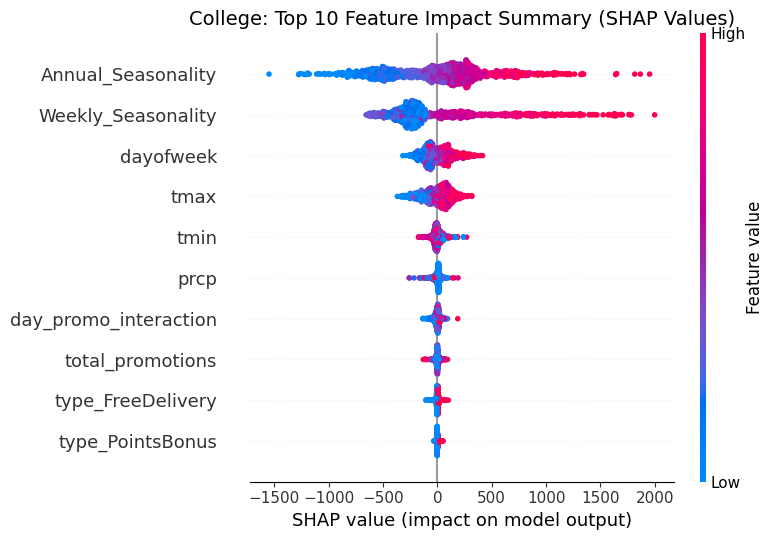

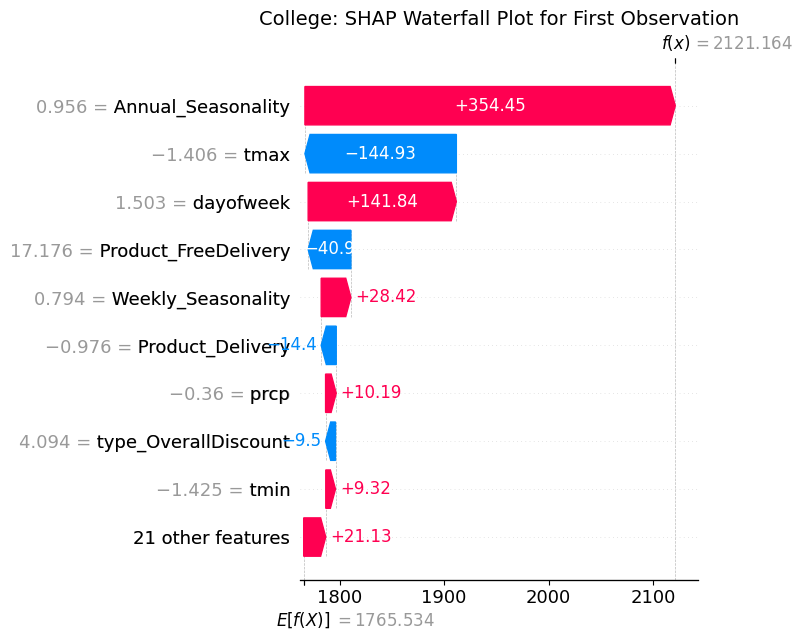

In [14]:
explainer = shap.Explainer(college_xgb, college_xvals)
shap_values = explainer(college_xvals)

# Summary plot with title
plt.figure()
shap.summary_plot(shap_values, college_xvals, max_display=10, show=False)
plt.title("College: Top 10 Feature Impact Summary (SHAP Values)", fontsize=14)
plt.tight_layout()
plt.show()

# Waterfall plot with title
plt.figure()
shap.plots.waterfall(shap_values[0], show=False)
plt.title("College: SHAP Waterfall Plot for First Observation", fontsize=14)
plt.tight_layout()
plt.show()

In [26]:
def save_individual_plots(models_list, output_dir="shap_plots"):
    """Save individual plots to a folder"""
    for model, xvals, city_name in tqdm(models_list):
        explainer = shap.Explainer(model, xvals)
        shap_values = explainer(xvals)
        
        # Save summary plot
        plt.figure()
        shap.summary_plot(shap_values, xvals, max_display=10, show=False)
        plt.title(f"{city_name}: SHAP Summary", fontsize=10)
        plt.savefig(f"{city_name}_summary.png", dpi=300, bbox_inches='tight')
        plt.close()
        
        # Save waterfall plot
        plt.figure()
        shap.plots.waterfall(shap_values[0], show=False)
        plt.title(f"{city_name}: Waterfall", fontsize=10)
        plt.savefig(f"{city_name}_waterfall.png", dpi=300, bbox_inches='tight')
        plt.close()

# Run it
models = [
    (college_xgb, college_xvals, "Colleges"),
    (nyc_xgb, nyc_xvals, "NYC"),
    (phi_xgb, phi_xvals, "Philadelphia"),
    (stl_xgb, stl_xvals, "StLouis")
]

save_individual_plots(models)

 98%|===================| 2531/2589 [00:18<00:00]        

In [33]:
import matplotlib.image as mpimg

def create_2x2_grid(image_paths, titles, file_name,figsize=(12, 10)):
    fig, axs = plt.subplots(2, 2, figsize=figsize)
    axs = axs.flatten()
    
    for ax, img_path, title in tqdm(zip(axs, image_paths, titles)):
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.set_title(title, fontsize=12)
        ax.axis('off')
    
    plt.tight_layout(pad=3.0)
    plt.savefig(file_name, dpi=300, bbox_inches='tight')
    #plt.show()

# Organize your saved files
image_paths = [
    "Colleges_summary.png",
    "NYC_summary.png",
    "Philadelphia_summary.png",
    "StLouis_summary.png"
]

titles = [
    "Colleges: Feature Impact",
    "NYC: Feature Impact",
    "Philadelphia: Feature Impact",
    "St. Louis: Feature Impact"
]

create_2x2_grid(image_paths, titles, file_name = "combined_shap_grid.png")

4it [00:00,  6.75it/s]


In [34]:
# For waterfall plots
waterfall_image_paths = [
    "Colleges_waterfall.png",
    "NYC_waterfall.png",
    "Philadelphia_waterfall.png",
    "StLouis_waterfall.png"
]

waterfall_titles = [
    "Colleges: First Observation Waterfall",
    "NYC: First Observation Waterfall",
    "Philadelphia: First Observation Waterfall",
    "St. Louis: First Observation Waterfall"
]

create_2x2_grid(
    image_paths=waterfall_image_paths,
    titles=waterfall_titles,
    figsize=(12, 10)  # You might want a larger size for waterfall plots
    ,file_name = "combined_shap_waterfalls.png" 
)

4it [00:00,  4.73it/s]


In [31]:
plot_types = ['summary', 'waterfall']

for plot_type in plot_types:
    paths = [f"{city}_{plot_type}.png" for city in ["Colleges", "NYC", "Philadelphia", "StLouis"]]
    titles = [f"{city}: {plot_type.capitalize()}" for city in ["Colleges", "NYC", "Philadelphia", "St. Louis"]]
    
    create_2x2_grid(
        image_paths=paths,
        titles=titles,
        figsize=(14, 12) if plot_type == 'waterfall' else (12, 10)
    )

4it [00:00,  6.28it/s]
4it [00:00,  4.93it/s]
